# Week 2 Assignment

Install `pip3 install statsmodels`

In [64]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import edhec_risk_kit_206 as erk
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load the 30 Value Weighted industry portfolio returns. Limit the analysis to returns of the 30 VW portfolios from 1997 onwards (1997 included, 1996 not included, 2018 included). Also load the Market Caps of each of the 30 industries. Run a backtest of comparing a CapWeighted vs an EW portfolio over the period. Though these two weighting schemes do not need any estimation, use an estimation period of 36 months so that we can compare it in the next few questions.

Hint: If you want to use the supplied code, import the final version of the backtester in file edhec_risk_kit_206 using: `import edhec_risk_kit_206 as erk`. Remember that to load the Value Weighted series you should use `erk.get_ind_returns(weighting="vw", ...)` and then use `erk.backtest_ws(rets, estimation_window=36, weighting=...)` The first month for which you have backtested returns should be 2000-01 and the last month should be 2018-12

In [65]:
# Load the 30 Value Weighted industry portfolio returns. Limit the analysis to returns of the 30 VW portfolios from 1997 onwards
ind_rets = erk.get_ind_returns(weighting="vw", n_inds=30)["1997":]
#ind_rets.head()
ind_rets.tail()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348
2018-12,-0.0973,-0.0969,-0.1580,-0.0824,-0.1535,-0.0557,-0.0728,-0.0840,-0.0776,-0.1009,...,-0.0884,-0.0765,-0.0923,-0.0863,-0.1519,-0.1121,-0.0919,-0.0628,-0.1144,-0.0693


In [66]:
# Also load the Market Caps of each of the 30 industries.
ind_mcap = erk.get_ind_market_caps(30, weights=True)["1997":]
#ind_mcap.head()
ind_mcap.tail()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2018-08,0.021873,0.008309,0.008222,0.011997,0.001168,0.014569,0.009720,0.103549,0.017596,0.000616,...,0.039896,0.161042,0.108402,0.010090,0.023453,0.010987,0.076225,0.014317,0.164637,0.047815
2018-09,0.021005,0.007873,0.007515,0.011923,0.001076,0.014427,0.009874,0.104324,0.016954,0.000618,...,0.039669,0.163597,0.114947,0.009675,0.023248,0.010992,0.080234,0.014275,0.162556,0.047549
2018-10,0.020661,0.007862,0.007831,0.011851,0.001052,0.014606,0.010000,0.106363,0.014954,0.000580,...,0.040434,0.163111,0.114711,0.009650,0.023535,0.010681,0.080886,0.014663,0.159464,0.048158
2018-11,0.022649,0.008403,0.009178,0.010810,0.001066,0.015702,0.009761,0.105080,0.014176,0.000467,...,0.043476,0.160187,0.114465,0.009333,0.023064,0.010674,0.078849,0.015642,0.161024,0.049159
2018-12,0.022832,0.008763,0.008291,0.010589,0.001083,0.016477,0.009510,0.109930,0.014630,0.000474,...,0.043953,0.159804,0.106189,0.009919,0.023915,0.010849,0.077102,0.016251,0.163053,0.050073


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.53298
CW,0.065196,0.151478,-0.556621,4.249894,0.071076,0.098531,0.225949,-0.51899


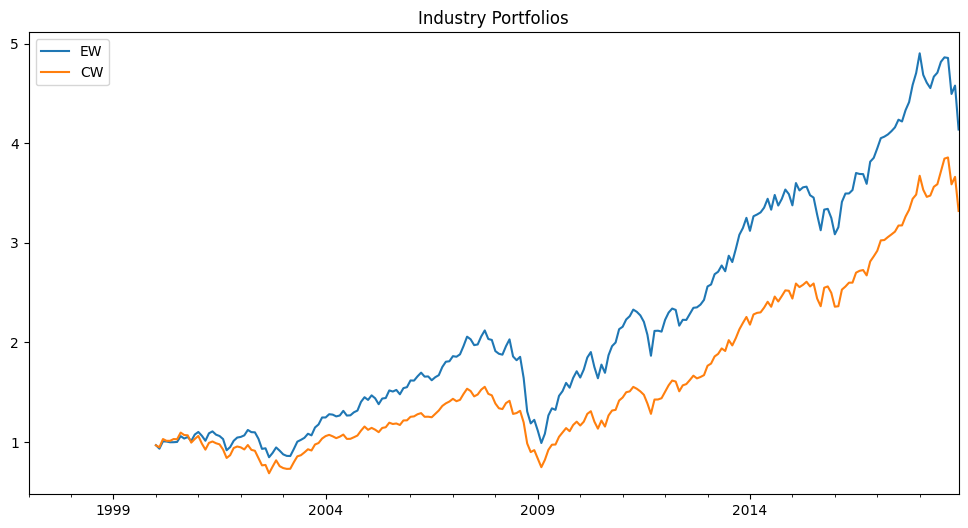

In [67]:
# Run a backtest of comparing a CapWeighted vs an EW portfolio over the period.
# Though these two weighting schemes do not need any estimation, use an estimation period of 36 months so that we can compare it in the next few questions.
ewr = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_ew)
cwr = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_cw, cap_weights=ind_mcap)
btr = pd.DataFrame({"EW": ewr, "CW": cwr})
(1+btr).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
stats = erk.summary_stats(btr.dropna())
stats

## 1. Question 1
What was the annualized return over period for the Cap Weighted Industry Portfolio?
Enter the answer as a percentage  (e.g. for a return of 5.67% enter 5.67)

In [68]:
round(stats["Annualized Return"]["CW"]*100, 2) # Answer is 6.52

6.52

## 2. Question 2
Use the same data and period as the previous question.
What was the annualized volatility over the period for the Cap Weighted Industry Portfolio?
Enter the answer as a percentage  (e.g. for a vol of 25.67% enter 25.67)

In [69]:
round(stats["Annualized Vol"]["CW"]*100, 2) # Answer is 15.15

15.15

## 3. Question 3
Use the same data and period as the previous question.
What was the annualized return over period for the Equal Weighted Industry Portfolio?
Enter the answer as a percentage  (e.g. for a return of 5.67% enter 5.67)

In [70]:
round(stats["Annualized Return"]["EW"]*100, 2) # Answer is 7.76

7.76

## 4. Question 4
Use the same data and period as the previous question.
What was the annualized volatility over the period for the Equal Weighted Industry Portfolio? 
Enter the answer as a percentage  (e.g. for a vol of 15.67% enter 15.67)

In [71]:
round(stats["Annualized Vol"]["EW"]*100, 2) # Answer is 15.87

15.87

## 5. Question 5
Now using the same data and same period, re-run the EW backtest but this time create a tethered EW portfolio by removing Microcap industries using a threshold of 1% and a max cap-weight multiple of 2X

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
EW-Tethered,0.076838,0.140774,-0.649872,4.664374,0.065482,0.093766,0.323653,-0.487413
CW,0.065196,0.151478,-0.556621,4.249894,0.071076,0.098531,0.225949,-0.518990


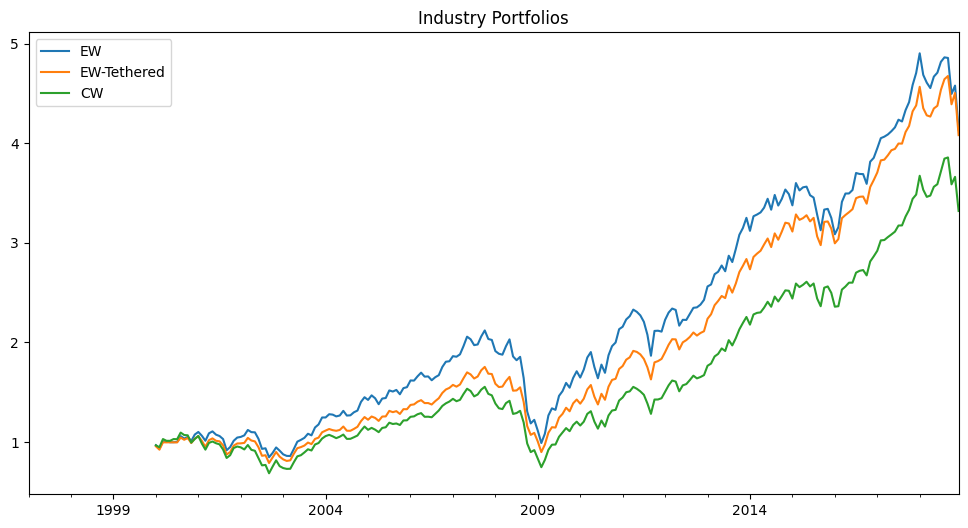

In [72]:
ewtr = erk.backtest_ws(ind_rets, estimation_window=36, cap_weights=ind_mcap, max_cw_mult=2, microcap_threshold=.01)
btr2 = pd.DataFrame({"EW": ewr, "EW-Tethered": ewtr, "CW": cwr})
(1+btr2).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
stats2 = erk.summary_stats(btr2.dropna())
stats2

What was the annualized return over the period for the tethered Equal Weighted Industry Portfolio?
Enter the answer as a percentage  (e.g. for a return of 5.67% enter 5.67)

In [73]:
round(stats2["Annualized Return"]["EW-Tethered"]*100, 2) # Answer is 7.68

7.68

## 6. Question 6
Use the same tethered EW portfolio (by removing Microcap industries using a threshold of 1% and a max cap-weight multiple of 2X) as in the previous question.
What was the annualized volatility over the period for the tethered Equal Weighted Industry Portfolio? 
Enter the answer as a percentage  (e.g. for a vol of 5.67% enter 5.67)

In [74]:
round(stats2["Annualized Vol"]["EW-Tethered"]*100, 2) # Answer is 14.08

14.08

## 7. Question 7
What was Tracking Error between the Pure EW (without any tethering) portfolio and the CW portfolio?
Enter the answer as a percentage  (e.g. for a Tracking Error of 5.67% enter 5.67)

In [75]:
round(erk.tracking_error(ewr, cwr)*100, 2) # Answer is 18.75

18.75

## 8. Question 8
Now consider the Tethered EW portfolio you previously created (by removing Microcap industries using a threshold of 1% and a max cap-weight multiple of 2X)
What was Tracking Error between the Tethered EW portfolio and the CW portfolio?
Enter the answer as a percentage  (e.g. for a Tracking Error of 5.67% enter 5.67)

In [76]:
round(erk.tracking_error(ewtr, cwr)*100, 2) # Answer is 11.67

11.67

## 9. Question 9
Run a backtest for the same period (1997 onwards i.e. 1997 included, 1996 not included, 2018 included), using an estimation window of 36 months as above, to build the Global Minimum Variance Portfolio by estimating the Covariance matrix using Sample Covariance. (This might take a minute or so to run depending on your computer power!) 

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.077614,0.158685,-0.538531,5.317042,0.072485,0.106220,0.291838,-0.532980
EW-Tethered,0.076838,0.140774,-0.649872,4.664374,0.065482,0.093766,0.323653,-0.487413
CW,0.065196,0.151478,-0.556621,4.249894,0.071076,0.098531,0.225949,-0.518990
GMV-Sample,0.066306,0.117410,-0.741085,4.469201,0.055456,0.080583,0.300813,-0.421289


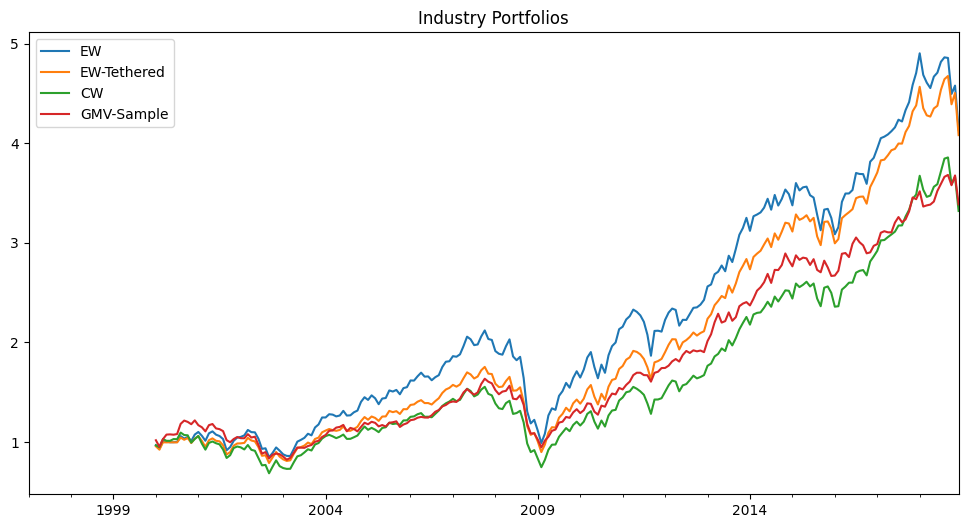

In [77]:
mv_s_r = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_gmv, cov_estimator=erk.sample_cov)
btr3 = pd.DataFrame({"EW": ewr, "EW-Tethered": ewtr, "CW": cwr, "GMV-Sample": mv_s_r})
(1+btr3).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
stats3 = erk.summary_stats(btr3.dropna())
stats3

What was the annualized return over the period for the GMV Portfolio?
Enter the answer as a percentage  (e.g. for a return of 5.67% enter 5.67)

In [78]:
round(stats3["Annualized Return"]["GMV-Sample"]*100, 2) # Answer is 6.63

6.63

## 10. Question 10
Use the same GMV portfolio as the previous question. What was the annualized volatility over the period for the GMV Portfolio?
Enter the answer as a percentage  (e.g. for a vol of 5.67% enter 5.67)

In [79]:
round(stats3["Annualized Vol"]["GMV-Sample"]*100, 2) # Answer is 11.74

11.74

## 11. Question 11
Run a backtest for the same period as the previous question, and again using an estimation window of 36 months as above, to build the Global Minimum Variance Portfolio but this time, estimating the Covariance matrix using Shrinkage between the Constant Correlation and Sample Covariance estimates using a delta of 0.25. (This might take a minute or so to run depending on your computer power!)

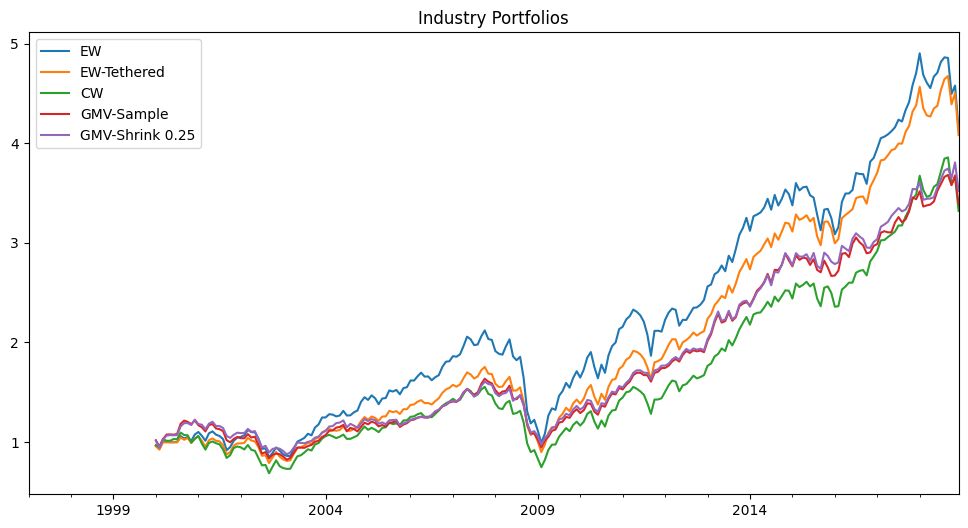

In [80]:
mv_sh_r = erk.backtest_ws(ind_rets, estimation_window=36, weighting=erk.weight_gmv, cov_estimator=erk.shrinkage_cov, delta=0.25)
btr4 = pd.DataFrame({"EW": ewr, "EW-Tethered": ewtr, "CW": cwr, "GMV-Sample": mv_s_r, "GMV-Shrink 0.25": mv_sh_r})
(1+btr4).cumprod().plot(figsize=(12,6), title="Industry Portfolios")
stats4 = erk.summary_stats(btr4.dropna())

What was the annualized return over the period for this new Shrinkage-GMV Portfolio?
Enter the answer as a percentage  (e.g. for a return of 5.67% enter 5.67)

In [81]:
round(stats4["Annualized Return"]["GMV-Shrink 0.25"]*100, 2) # Answer is 6.85

6.85

## 12. Question 12
Using the same Shrinkage-GMV portfolio return series you used in the previous question, what was the annualized volatility over the period for the Shrinkage-GMV Portfolio?
Enter the answer as a percentage  (e.g. for a vol of 5.67% enter 5.67)

In [82]:
round(stats4["Annualized Vol"]["GMV-Shrink 0.25"]*100, 2) # Answer is 11.46

11.46